## 1. a) Formulate the problem in the Excel file and generate the sensitivity analysis

 Let x be no. of dozen baseballs produced Let y be no. of dozen softballs produced

 Profit has to be maximized.
 
 Max  7x1 + 10x2
   
 subject to :
 
 x1<=500
 
 x2<=500
 
 5x1 + 6x2 <=3600
 
 x1+ 2x2 <=960

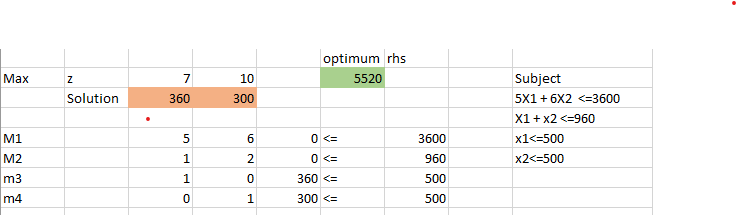

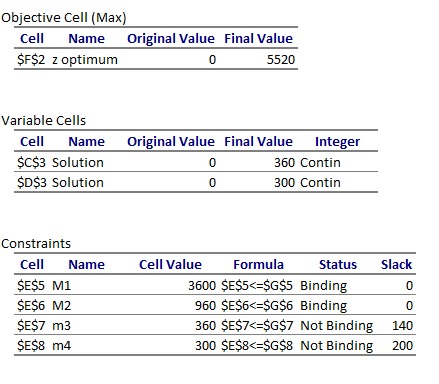

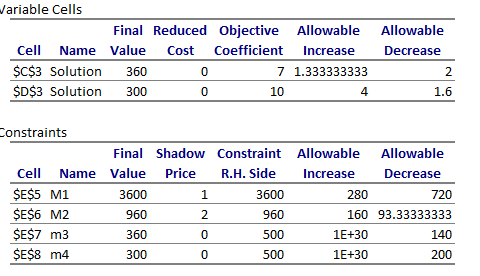

## 1b) Write on cost coefficient sensitivity analysis.

 The cost cost coefficient sensitivity analysis deals with changing the objective function coefficients and analysing the impact. In this case, x can be increased by 1.33 units and decreased by 2 units. y can be increased by 4 units and decreased by 1.6 units.
 



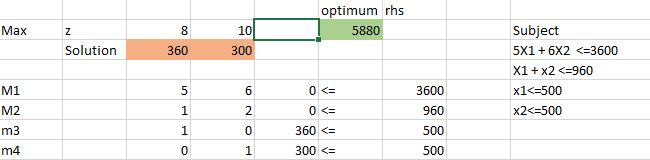

## 1c) Write on Right Hand Side Sensitivity Analysis.

It deals with how changes in the rhs can trigger changes in the optimum value while keeping the optimum same. Changing the rhs means changing the resource limits.

960 can be increased by 160 and decreased by 93.33.
3600 can be increased by 280 and decreased by 720.

Capacities of x and y can be increased indefinitely.
x can be decreased by 140.
y can be decreased by 200. 

Shadow Price of M1 is 1 and allowable increase is 280
Shadow Price OF M2 is 2 and allowable increase is 160 so Resource 2 is preffered

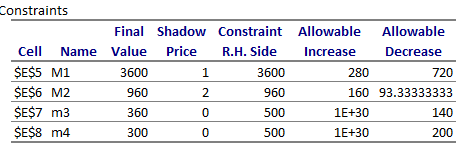

##  1d) Solve the formulated LP problem using scipy.optimise and verify your solution with the solution (a)

In [2]:
import numpy as np
from scipy.optimize import linprog
from scipy import linalg

z = np.array([-7,-10])
A = [[5,6],[1,2]]
b = [3600,960]
bounds = [(0,500),(0,500)] 
res = linprog(c=z, A_ub=A, b_ub=b, bounds=bounds)
res
z_opt = res.fun
print(f'The optimum value {-z_opt} occurs at the optimal solution {res.x}.\nHence, {int(res.x[0])} dozen baseballs and {int(res.x[1])} dozen softballs have to be manufactured to generate maximum profit of ${-z_opt} subject to the given constraints. Thus, it corresponds to the solution obtained in the Excel.')

The optimum value 5519.999990332584 occurs at the optimal solution [359.99999938 299.99999947].
Hence, 359 dozen baseballs and 299 dozen softballs have to be manufactured to generate maximum profit of $5519.999990332584 subject to the given constraints. Thus, it corresponds to the solution obtained in the Excel.


## 2. Consider the following problem:
## 𝑓(𝑥1, 𝑥2) = $4X1 + 6X2 -2X1^2 -2X1X2 - 2X2^2$
a) Write a program to visualize the above function.

b) Write a iterative program to maximize the function

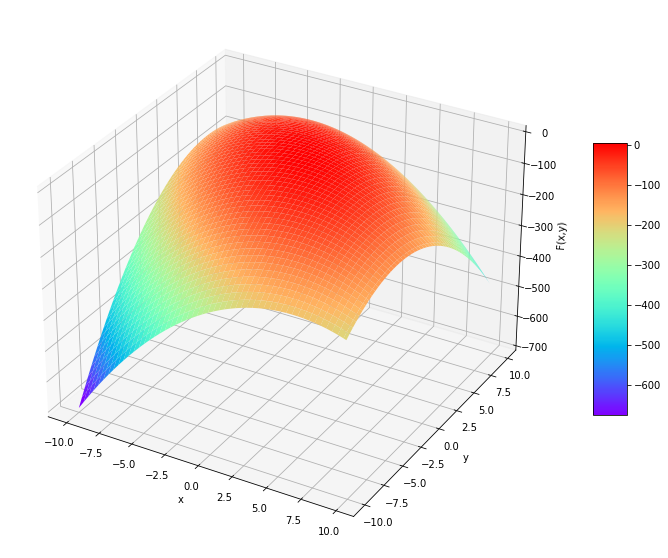

In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

def f(x1,x2):
    return 4*x1 +6*x2-2*x1**2-2*x1*x2-2*x2**2
fig = plt.figure(figsize=(15,10))
ax = plt.axes(projection='3d')  #setting the #D projection axis 
ax.grid()
x = np.arange(-10,10,0.2) #getting the points
y= np.arange(-10,10,0.2)
X, Y = np.meshgrid(x,y)
ax.set_xlabel('x')
ax.set_ylabel('y') 
ax.set_zlabel('F(x,y)')
surf = ax.plot_surface(X,Y,f(X,Y),cmap= plt.cm.rainbow)
fig.colorbar(surf, shrink=0.5, aspect=8)
plt.show()

## 2)b

In [6]:
def f(x1,x2):
    return 4*x1 +6*x2-2*x1**2-2*x1*x2-2*x2**2
def g(x1,x2):
    return [4-4*x1-2*x2,6-2*x1-4*x2]
def gj(x1,x2):
    return [[0,-2],[-2,-4]]
def newton_raphson(xk,e,n):
    xk1 = np.array([[0],[0]])
    x1 = xk[0][0]
    x2 = xk[1][0]
    flag = 0
    
    for i in range(n):
        a = gj(x1,x2)
        xk1 = np.subtract(xk,linalg.inv(a)@g(x1,x2))
        x1 = xk1[0][0]
        x2 = xk1[1][0]
        xk = xk1
        if abs(x1-x2) < e:
            flag = 1
            break    
    
    if flag == 0: 
        return
    
    return xk1

x = np.array([[1],[2]])
y = newton_raphson(x,0.0001,500)
y

array([[ 1.2009599e+16, -1.2009599e+16],
       [ 1.2009599e+16, -1.2009599e+16]])